<a href="https://colab.research.google.com/github/OswaldVc/AnaDat/blob/main/energ%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

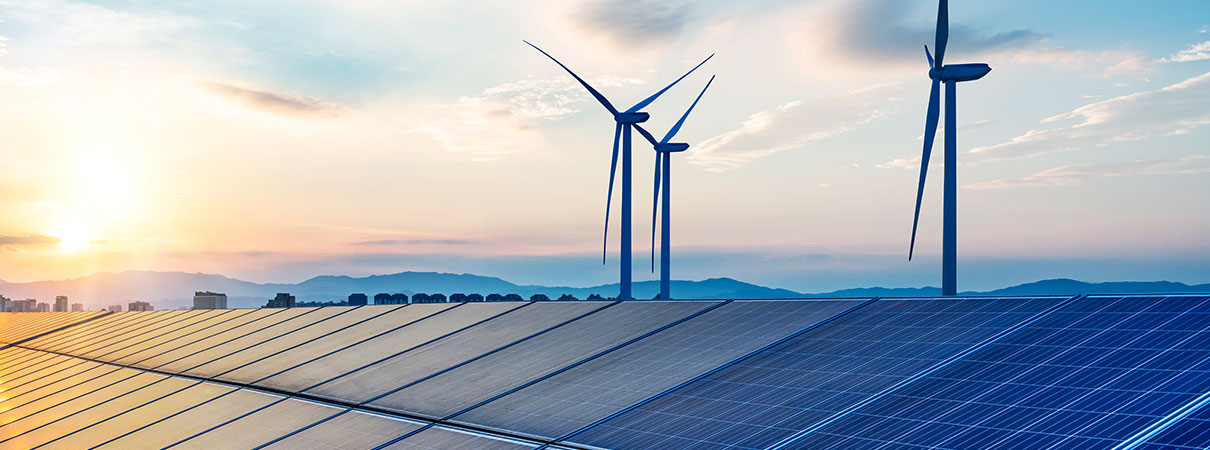

>>> **CONSUMO ENERGÉTICO MUNDIAL**

>Néstor O. Vásquez C.

In [2]:
%%capture
!pip install skforecast

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import OrderedDict
import statsmodels.formula.api as smf
from   scipy import stats
from scipy import stats

##  Importación de Módulos
# ==============================================================================
from locale import normalize
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import missingno as msno

## Data cleaning y data wrangling
# ==============================================================================
import pandas            as pd
import numpy             as np
## Visualización
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings

# Modelado y Forecasting
# ==============================================================================
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor


# Modelado y Arima
# ==============================================================================

%matplotlib inline
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')


# Gráficos
# ==============================================================================

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"


sns.set_style("darkgrid") ## Estilo para los gráficos
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [10]:
# Lectura de archivo desde GitHub.
df=pd.read_csv('https://raw.githubusercontent.com/OswaldVc/BDD/main/data_energia.csv',encoding='latin1')
df.head(2)

,PAÍS,CODIGO_TIEMPO,TIEMPO_MES,AÑO,MES,MES_NOMBRE,PRODUCTO,VALOR,VISUALIZACIÓN,AÑO_HASTA_FECHA,ANTERIOR_HASTA_FECHA,COMPARTIR
0,Australia,Jan-10,Jan-10,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,Jan-10,Jan-10,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744


In [16]:
unique_countries_count = df['PAÍS'].nunique()
unique_countries_list = df['PAÍS'].unique()

print("Número de países diferentes:", unique_countries_count)
print("Diferentes paises", unique_countries_list)

Número de países diferentes: 52
Diferentes paises ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'IEA Total' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'OECD Americas' 'OECD Asia Oceania' 'OECD Europe' 'OECD Total' 'Poland'
 'Portugal' 'Republic of Turkiye' 'Slovak Republic' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'United Kingdom' 'United States' 'Colombia'
 'Argentina' 'Brazil' 'Bulgaria' 'Croatia' 'Cyprus' 'India' 'Malta'
 'North Macedonia' 'Romania' 'Serbia' 'Costa Rica']


In [21]:
datos_españa = df[df['PAÍS'] == 'Republic of Turkiye']
# Mostrar resultados
datos_españa.tail()

,PAÍS,CODIGO_TIEMPO,TIEMPO_MES,AÑO,MES,MES_NOMBRE,PRODUCTO,VALOR,VISUALIZACIÓN,AÑO_HASTA_FECHA,ANTERIOR_HASTA_FECHA,COMPARTIR
181704,Republic of Turkiye,Dec-22,Dec-22,2022,12,December,Non-renewables,17118.575450,23,179285.576200,202133.13830,0.677125
181705,Republic of Turkiye,Dec-22,Dec-22,2022,12,December,Others,111.193449,24,1971.873925,1920.76024,0.004398
181706,Republic of Turkiye,Dec-22,Dec-22,2022,12,December,Other renewables aggregated,1529.258050,25,16594.174350,14784.03456,0.060490
181707,Republic of Turkiye,Dec-22,Dec-22,2022,12,December,Low carbon,8261.257815,26,134811.760700,115941.72270,0.326774
181708,Republic of Turkiye,Dec-22,Dec-22,2022,12,December,Fossil fuels,17118.575450,27,179285.576200,202133.13830,0.677125


In [25]:
Datos_producto = datos_españa[(datos_españa['PRODUCTO'] == 'Wind') | (datos_españa['PRODUCTO'] == 'Solar')]

# Mostrar resultados
Datos_producto.head()

,PAÍS,CODIGO_TIEMPO,TIEMPO_MES,AÑO,MES,MES_NOMBRE,PRODUCTO,VALOR,VISUALIZACIÓN,AÑO_HASTA_FECHA,ANTERIOR_HASTA_FECHA,COMPARTIR
764,Republic of Turkiye,Jan-10,Jan-10,2010,1,January,Wind,240.631,2,2908.0,NaN,0.014297
765,Republic of Turkiye,Jan-10,Jan-10,2010,1,January,Solar,0.000,3,0.0,NaN,0.000000
1730,Republic of Turkiye,Feb-10,Feb-10,2010,2,February,Wind,205.932,2,2908.0,NaN,0.013452
1731,Republic of Turkiye,Feb-10,Feb-10,2010,2,February,Solar,0.000,3,0.0,NaN,0.000000
2695,Republic of Turkiye,Mar-10,Mar-10,2010,3,March,Wind,187.762,2,2908.0,NaN,0.011361


In [26]:
wind_verileriSp = datos_españa[(datos_españa['PRODUCTO'] == 'Wind')]

wind_verileriSp.head()

,PAÍS,CODIGO_TIEMPO,TIEMPO_MES,AÑO,MES,MES_NOMBRE,PRODUCTO,VALOR,VISUALIZACIÓN,AÑO_HASTA_FECHA,ANTERIOR_HASTA_FECHA,COMPARTIR
764,Republic of Turkiye,Jan-10,Jan-10,2010,1,January,Wind,240.631,2,2908.0,NaN,0.014297
1730,Republic of Turkiye,Feb-10,Feb-10,2010,2,February,Wind,205.932,2,2908.0,NaN,0.013452
2695,Republic of Turkiye,Mar-10,Mar-10,2010,3,March,Wind,187.762,2,2908.0,NaN,0.011361
3661,Republic of Turkiye,Apr-10,Apr-10,2010,4,April,Wind,185.401,2,2908.0,NaN,0.011764
4627,Republic of Turkiye,May-10,May-10,2010,5,May,Wind,125.448,2,2908.0,NaN,0.007787


In [28]:
wind_verileriSp['tarih'] = pd.to_datetime(wind_verileriSp['AÑO'].astype(str) + ' ' + wind_verileriSp['MES_NOMBRE'], format='%Y %B')

# Establecer la columna "fecha" como índice
wind_verileriSp.set_index('tarih', inplace=True)
wind_verileriSp.head()

,PAÍS,CODIGO_TIEMPO,TIEMPO_MES,AÑO,MES,MES_NOMBRE,PRODUCTO,VALOR,VISUALIZACIÓN,AÑO_HASTA_FECHA,ANTERIOR_HASTA_FECHA,COMPARTIR
tarih,,,,,,,,,,,,
2010-01-01,Republic of Turkiye,Jan-10,Jan-10,2010,1,January,Wind,240.631,2,2908.0,NaN,0.014297
2010-02-01,Republic of Turkiye,Feb-10,Feb-10,2010,2,February,Wind,205.932,2,2908.0,NaN,0.013452
2010-03-01,Republic of Turkiye,Mar-10,Mar-10,2010,3,March,Wind,187.762,2,2908.0,NaN,0.011361
2010-04-01,Republic of Turkiye,Apr-10,Apr-10,2010,4,April,Wind,185.401,2,2908.0,NaN,0.011764
2010-05-01,Republic of Turkiye,May-10,May-10,2010,5,May,Wind,125.448,2,2908.0,NaN,0.007787


In [29]:
wind_verileriSp.isnull().sum()

PAÍS                     0
CODIGO_TIEMPO            0
TIEMPO_MES               0
AÑO                      0
MES                      0
MES_NOMBRE               0
PRODUCTO                 0
VALOR                    0
VISUALIZACIÓN            0
AÑO_HASTA_FECHA          0
ANTERIOR_HASTA_FECHA    12
COMPARTIR                0
dtype: int64

In [30]:
q1 = wind_verileriSp["VALOR"].quantile(0.25)
q3 = wind_verileriSp["VALOR"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

wind_verileriSp[(wind_verileriSp["VALOR"] < low) | (wind_verileriSp["VALOR"] > up)]

wind_verileriSp[(wind_verileriSp["VALOR"] < low) | (wind_verileriSp["VALOR"] > up)].index

DatetimeIndex(['2022-07-01'], dtype='datetime64[ns]', name='tarih', freq=None)

In [33]:
wind_verileriSp["VALOR"].fillna(wind_verileriSp["VALOR"].mean()).isnull().sum()
wind_verileriSp["VALOR"].fillna(0).isnull().sum()

0

In [35]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observaciones: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(wind_verileriSp)

Observaciones: 156
Variables: 12
cat_cols: 4
num_cols: 6
cat_but_car: 2
num_but_cat: 1


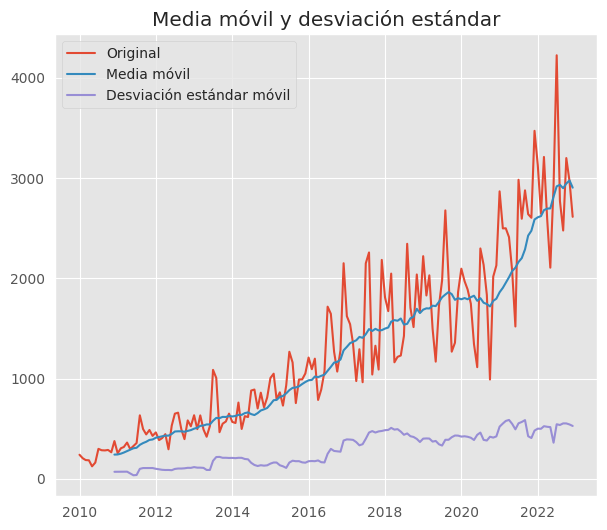

ADF Estadística: 0.6681506494656555
p-value: 0.9891803512917743
Número de retrasos utilizados: 13
Número de observaciones utilizadas: 142
Valores criticos: -3.477261624048995
Non-Estacionaria


In [50]:
# Análisis de estacionariedad
def test_stationarity(timeseries):
    # Media móvil y desviación estándar
    rolmean = timeseries.rolling(window=12).mean()  # media móvil de 7 días
    rolstd = timeseries.rolling(window=12).std()   # desviación estándar de 7 días

    # Visualización
    plt.figure(figsize=(7, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Media móvil')
    plt.plot(rolstd, label='Desviación estándar móvil')
    plt.title('Media móvil y desviación estándar')
    plt.legend()
    plt.show()

    # Prueba de Dickey-Fuller aumentada
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Estadística:', result[0])
    print('p-value:', result[1])
    print('Número de retrasos utilizados:', result[2])
    print('Número de observaciones utilizadas:', result[3])
    print('Valores criticos:', result[4]['1%'])
    print('Estacionaria' if result[1] <= 0.05 else 'Non-Estacionaria')

# Análisis de estacionariedad con Media móvil y desviación estándar
test_stationarity(wind_verileriSp["VALOR"])

<Figure size 1600x600 with 0 Axes>

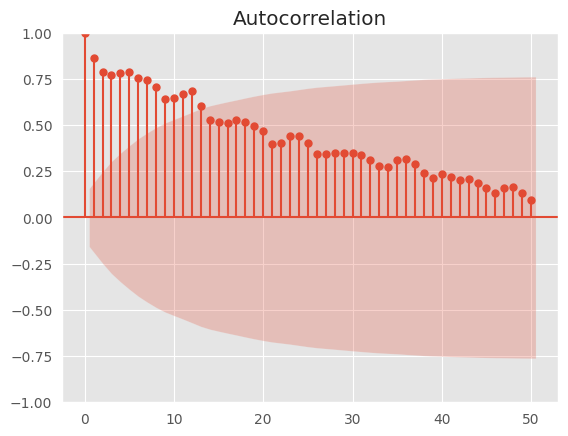

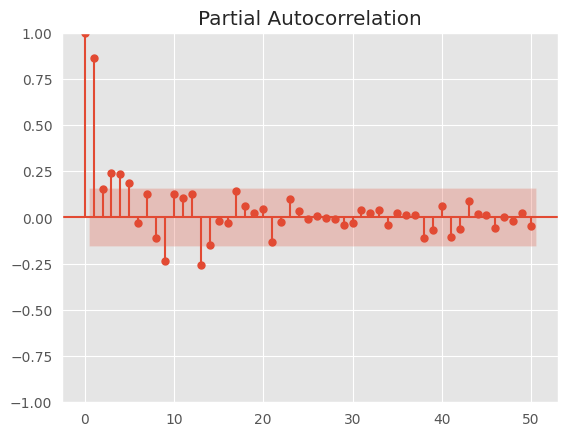

In [47]:
# Series temporales ACF y PACF
plt.figure(figsize=(16, 6))
plot_acf(wind_verileriSp["VALOR"], lags=50)
plt.show();

plot_pacf(wind_verileriSp["VALOR"], lags=50)
plt.show();

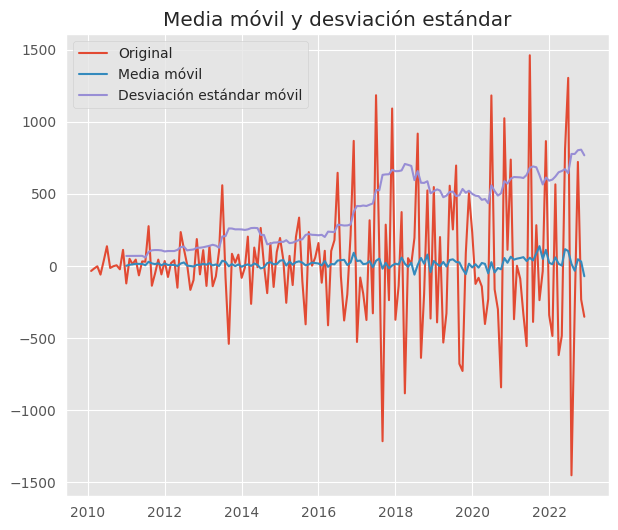

ADF Estadística: -3.6199560143804175
p-value: 0.005390774627049601
Número de retrasos utilizados: 12
Número de observaciones utilizadas: 142
Valores criticos: -3.477261624048995
Estacionaria


In [53]:
# Suponiendo que tienes un DataFrame llamado wind_verileriSp
# Extrae las columnas "AÑO" y "MES"
year_month_columns = wind_verileriSp[["AÑO", "MES"]]

# Aplicar diferenciación solo a la columna "VALOR"
wind_finaldiff_value = wind_verileriSp["VALOR"].diff().dropna()

# Análisis de estacionariedad con media móvil y desviación estándar
# Proporcione solo la columna "VALOR" a la función test_stationarity
test_stationarity(wind_finaldiff_value)

In [54]:
wind_finaldiff = pd.concat([year_month_columns, wind_finaldiff_value], axis=1)
wind_finaldiff.head()

,AÑO,MES,VALOR
tarih,,,
2010-01-01,2010,1,NaN
2010-02-01,2010,2,-34.699
2010-03-01,2010,3,-18.170
2010-04-01,2010,4,-2.361
2010-05-01,2010,5,-59.953


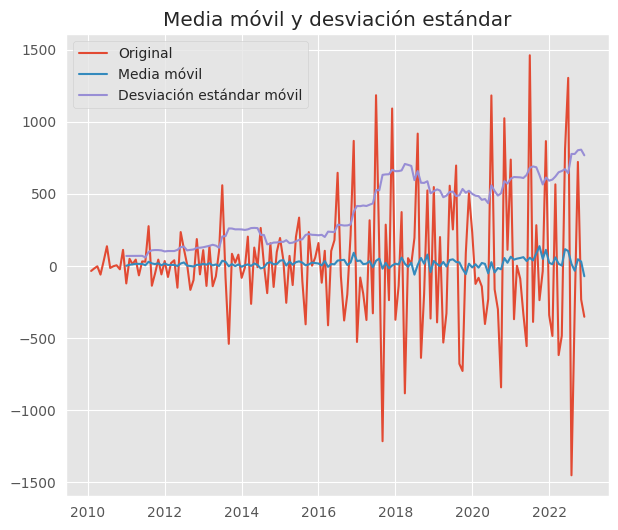

ADF Estadística: -3.6199560143804175
p-value: 0.005390774627049601
Número de retrasos utilizados: 12
Número de observaciones utilizadas: 142
Valores criticos: -3.477261624048995
Estacionaria


In [56]:
# 1. Diferenciación
wind_finaldiff = wind_verileriSp["VALOR"].diff().dropna()

# Análisis de estacionariedad con media móvil y desviación estándar
test_stationarity(wind_finaldiff)

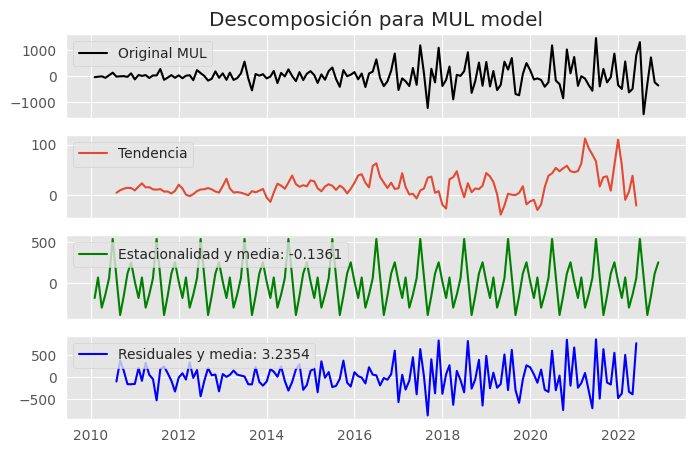

In [62]:
# Componentes de series temporales y pruebas de estacionariedad

def ts_decompose(y, model="ADD", stationary=False):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(5)
    fig.set_figwidth(8)

    axes[0].set_title("Descomposición para " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Tendencia')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Estacionalidad y media: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'b', label='Residuales y media: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)



ts_decompose(wind_finaldiff,model="MUL", stationary=True)

>>> **Modelos de pronóstico sin variables en su forma estacionaria**

In [63]:
train = wind_finaldiff[:'2019-12-01']
test = wind_finaldiff['2020-01-01':]

>>> **Modelo ARIMA(p, d, q): (Promedio móvil integrado autorregresivo)**

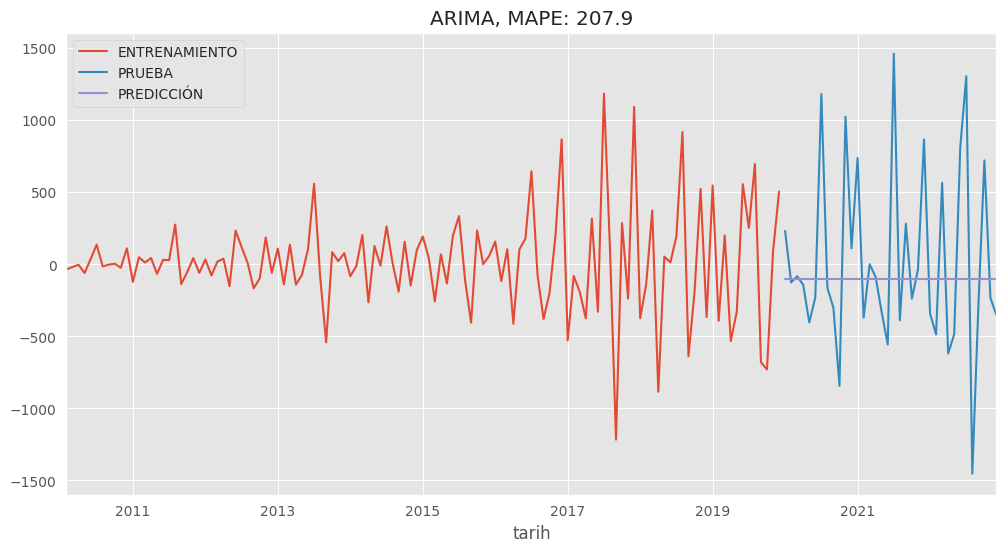

In [65]:
# ARIMA(p, d, q): (Promedio móvil integrado autorregresivo)
#############################################################

arima_model = ARIMA(train, order=(1, 1, 1)).fit()

arima_model.summary()

windSp_pred = arima_model.forecast(24)[0]
windSp_pred = pd.Series(windSp_pred, index=test.index)

def plot_co2(train, test, y_pred, title):
    absolute_errors = abs(test - y_pred)
    actual_values = test.copy()
    actual_values[actual_values == 0] = 1  # Evite la división por cero
    percentage_errors = (absolute_errors / actual_values) * 100
    mape = np.mean(percentage_errors)

    train.plot(legend=True, label="ENTRENAMIENTO", title=f"{title}, MAPE: {round(mape, 2)}")
    test.plot(legend=True, label="PRUEBA", figsize=(12, 6))
    y_pred.plot(legend=True, label="PREDICCIÓN")
    plt.show()

plot_co2(train, test, windSp_pred, "ARIMA")

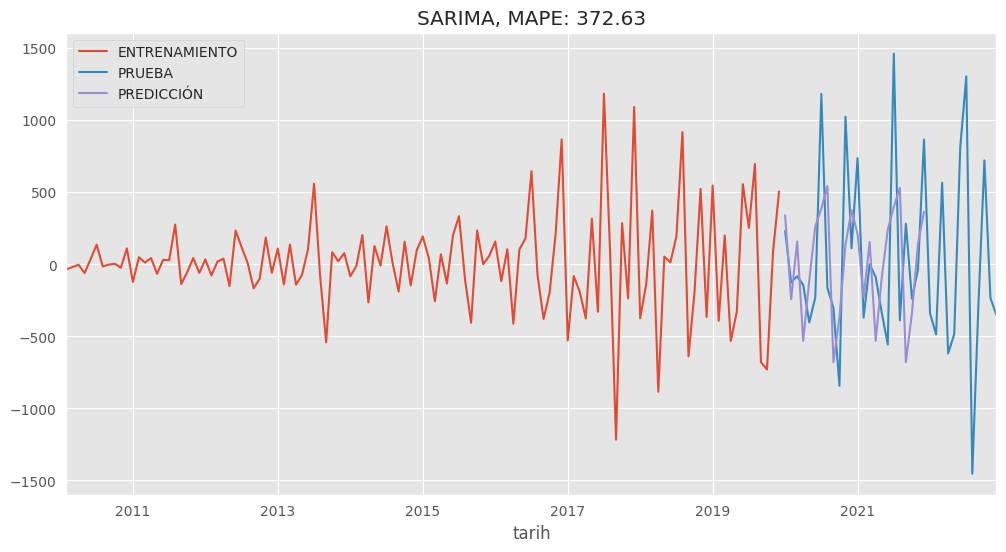

In [66]:
# SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)
######################################################################

model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit(disp=0)
windSp_pred_test = sarima_model.get_forecast(steps=24)
windSp_pred = windSp_pred_test.predicted_mean
windSp_pred = pd.Series(windSp_pred, index=test.index)
plot_co2(train, test, windSp_pred, "SARIMA")

>>> **Resultados de la estimación sin análisis de estacionariedad.**

In [67]:
train2 = wind_verileriSp["VALOR"][:'2019-12-01']
test2 = wind_verileriSp["VALOR"]['2020-01-01':]

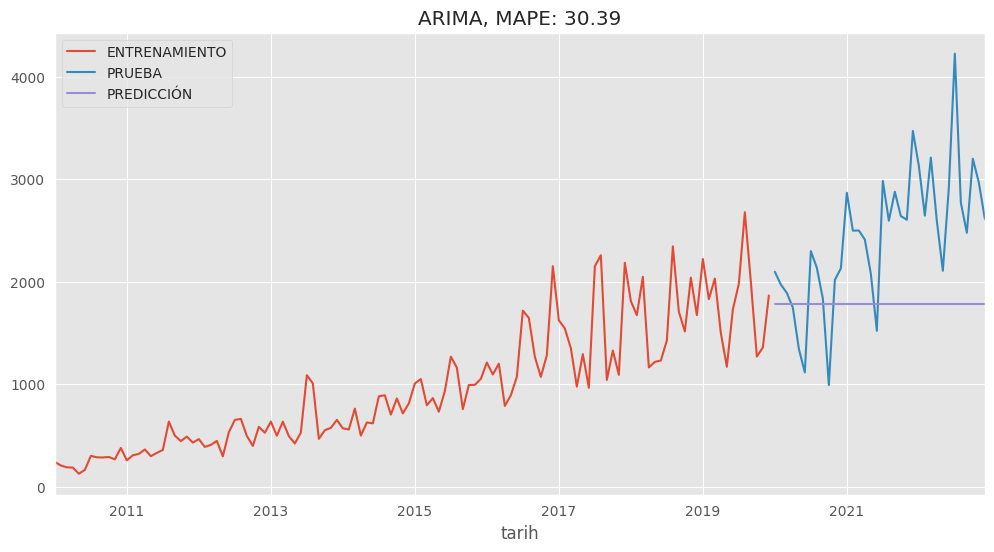

In [68]:
# ARIMA(p, d, q): (Autoregressive Integrated Moving Average)
##################################################

arima_model2 = ARIMA(train2, order=(1, 1, 1)).fit()
arima_model2.summary()

windSp_pred2 = arima_model2.forecast(24)[0]
windSp_pred2 = pd.Series(windSp_pred2, index=test.index)

plot_co2(train2, test2, windSp_pred2, "ARIMA")

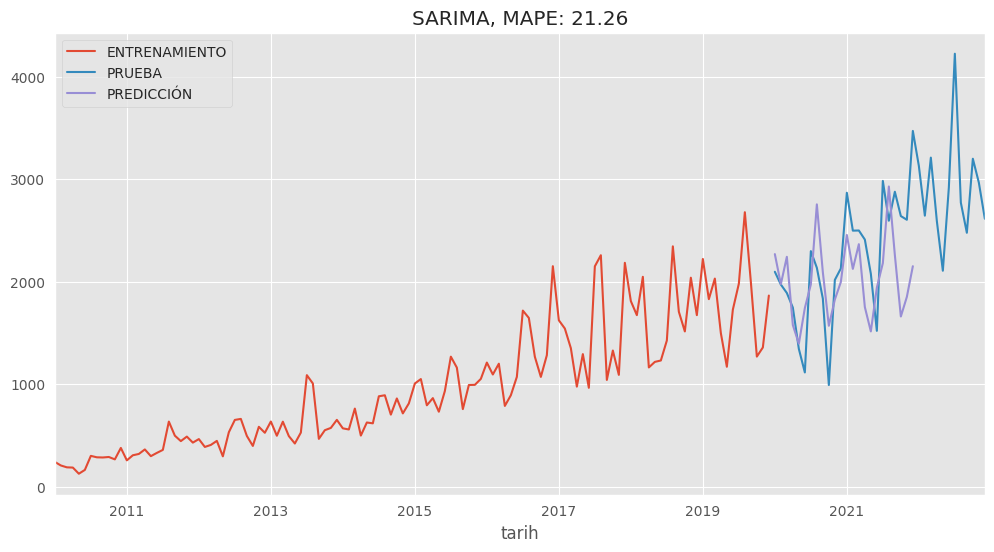

In [69]:
# SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)
##################################################

model2 = SARIMAX(train2, order=(1, 0, 1), seasonal_order=(2, 1, 1, 12))
sarima_model2 = model2.fit(disp=0)

windSp_pred_test2 = sarima_model2.get_forecast(steps=24)
windSp_pred2 = windSp_pred_test2.predicted_mean
windSp_pred2 = pd.Series(windSp_pred2, index=test.index)

plot_co2(train2, test2, windSp_pred2, "SARIMA")

In [73]:
# # Optimización de hiperparámetros
####################################

def ses_optimizer(train, alphas, step=36):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.8, 1, 0.01)

# yt_sapka = a * yt-1 + (1-a)* (yt_-1)_sapka

ses_optimizer(train2, alphas)
best_alpha, best_mae = ses_optimizer(train2, alphas)

alpha: 0.8 mae: 1744.5267
alpha: 0.81 mae: 1748.9594
alpha: 0.82 mae: 1753.4758
alpha: 0.83 mae: 1758.0702
alpha: 0.84 mae: 1762.737
alpha: 0.85 mae: 1767.4705
alpha: 0.86 mae: 1772.2649
alpha: 0.87 mae: 1777.1144
alpha: 0.88 mae: 1782.0134
alpha: 0.89 mae: 1786.9563
alpha: 0.9 mae: 1791.9373
alpha: 0.91 mae: 1796.9509
alpha: 0.92 mae: 1801.9916
alpha: 0.93 mae: 1807.054
alpha: 0.94 mae: 1812.1327
alpha: 0.95 mae: 1817.2224
alpha: 0.96 mae: 1822.3181
alpha: 0.97 mae: 1827.4147
alpha: 0.98 mae: 1832.5074
alpha: 0.99 mae: 1837.5913
best_alpha: 0.8 best_mae: 1744.5267
alpha: 0.8 mae: 1744.5267
alpha: 0.81 mae: 1748.9594
alpha: 0.82 mae: 1753.4758
alpha: 0.83 mae: 1758.0702
alpha: 0.84 mae: 1762.737
alpha: 0.85 mae: 1767.4705
alpha: 0.86 mae: 1772.2649
alpha: 0.87 mae: 1777.1144
alpha: 0.88 mae: 1782.0134
alpha: 0.89 mae: 1786.9563
alpha: 0.9 mae: 1791.9373
alpha: 0.91 mae: 1796.9509
alpha: 0.92 mae: 1801.9916
alpha: 0.93 mae: 1807.054
alpha: 0.94 mae: 1812.1327
alpha: 0.95 mae: 1817.2224


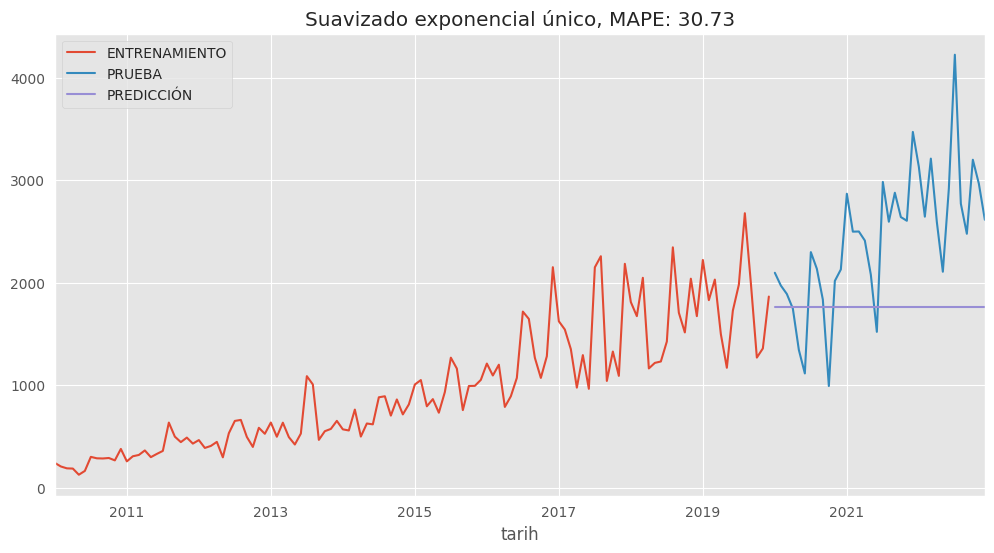

In [75]:
# Modelo SES final
############################

ses_model = SimpleExpSmoothing(train2).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(36)

plot_co2(train2, test2, y_pred, "Suavizado exponencial único")

In [76]:
def des_optimizer(train, alphas, betas, step=36):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred2 = des_model.forecast(step)
            mae = mean_absolute_error(test2, y_pred2)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train2, alphas, betas)

alpha: 0.01 beta: 0.01 mae: 488.0562
alpha: 0.01 beta: 0.11 mae: 442.9739
alpha: 0.01 beta: 0.21 mae: 393.3933
alpha: 0.01 beta: 0.31 mae: 399.4629
alpha: 0.01 beta: 0.41 mae: 431.7929
alpha: 0.01 beta: 0.51 mae: 481.7975
alpha: 0.01 beta: 0.61 mae: 539.7482
alpha: 0.01 beta: 0.71 mae: 613.4951
alpha: 0.01 beta: 0.81 mae: 699.1056
alpha: 0.01 beta: 0.91 mae: 771.1481
alpha: 0.11 beta: 0.01 mae: 501.534
alpha: 0.11 beta: 0.11 mae: 648.8692
alpha: 0.11 beta: 0.21 mae: 722.0688
alpha: 0.11 beta: 0.31 mae: 805.903
alpha: 0.11 beta: 0.41 mae: 995.0216
alpha: 0.11 beta: 0.51 mae: 1276.2083
alpha: 0.11 beta: 0.61 mae: 1546.1707
alpha: 0.11 beta: 0.71 mae: 1689.2477
alpha: 0.11 beta: 0.81 mae: 1708.0069
alpha: 0.11 beta: 0.91 mae: 1720.7946
alpha: 0.21 beta: 0.01 mae: 548.5197
alpha: 0.21 beta: 0.11 mae: 766.359
alpha: 0.21 beta: 0.21 mae: 996.1608
alpha: 0.21 beta: 0.31 mae: 1279.8649
alpha: 0.21 beta: 0.41 mae: 1501.8125
alpha: 0.21 beta: 0.51 mae: 1642.9388
alpha: 0.21 beta: 0.61 mae: 1726.

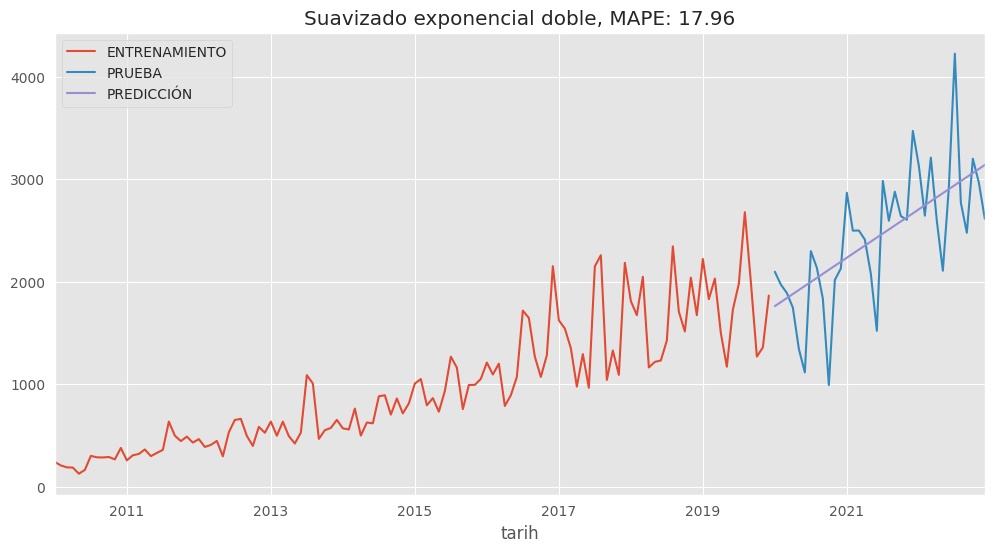

In [77]:
# Final DES Model
############################

final_des_model = ExponentialSmoothing(train2, trend="add").fit(smoothing_level=best_alpha,
                                                               smoothing_slope=best_beta)

y_pred2 = final_des_model.forecast(36)
plot_co2(train2, test2, y_pred2, "Suavizado exponencial doble")

In [78]:
# Optimización de hiperparámetros
############################

alphas = betas = gammas = np.arange(0.20, 1, 0.10)

abg = list(itertools.product(alphas, betas, gammas))


def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred3 = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train2, abg)

[0.2, 0.2, 0.2, 1744.53]
[0.2, 0.2, 0.3, 1744.53]
[0.2, 0.2, 0.4, 1744.53]
[0.2, 0.2, 0.5, 1744.53]
[0.2, 0.2, 0.6, 1744.53]
[0.2, 0.2, 0.7, 1744.53]
[0.2, 0.2, 0.8, 1744.53]
[0.2, 0.2, 0.9, 1744.53]
[0.2, 0.3, 0.2, 1744.53]
[0.2, 0.3, 0.3, 1744.53]
[0.2, 0.3, 0.4, 1744.53]
[0.2, 0.3, 0.5, 1744.53]
[0.2, 0.3, 0.6, 1744.53]
[0.2, 0.3, 0.7, 1744.53]
[0.2, 0.3, 0.8, 1744.53]
[0.2, 0.3, 0.9, 1744.53]
[0.2, 0.4, 0.2, 1744.53]
[0.2, 0.4, 0.3, 1744.53]
[0.2, 0.4, 0.4, 1744.53]
[0.2, 0.4, 0.5, 1744.53]
[0.2, 0.4, 0.6, 1744.53]
[0.2, 0.4, 0.7, 1744.53]
[0.2, 0.4, 0.8, 1744.53]
[0.2, 0.4, 0.9, 1744.53]
[0.2, 0.5, 0.2, 1744.53]
[0.2, 0.5, 0.3, 1744.53]
[0.2, 0.5, 0.4, 1744.53]
[0.2, 0.5, 0.5, 1744.53]
[0.2, 0.5, 0.6, 1744.53]
[0.2, 0.5, 0.7, 1744.53]
[0.2, 0.5, 0.8, 1744.53]
[0.2, 0.5, 0.9, 1744.53]
[0.2, 0.6, 0.2, 1744.53]
[0.2, 0.6, 0.3, 1744.53]
[0.2, 0.6, 0.4, 1744.53]
[0.2, 0.6, 0.5, 1744.53]
[0.2, 0.6, 0.6, 1744.53]
[0.2, 0.6, 0.7, 1744.53]
[0.2, 0.6, 0.8, 1744.53]
[0.2, 0.6, 0.9, 1744.53]


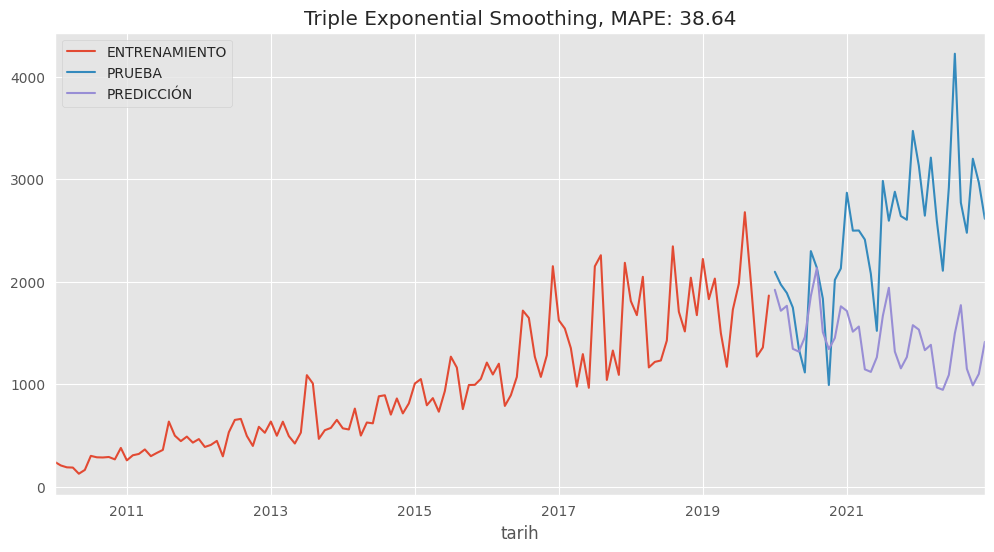

In [79]:
# Modelo TES final
############################

final_tes_model = ExponentialSmoothing(train2, trend="mul", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

y_pred3 = final_tes_model.forecast(36)

plot_co2(train2, test2, y_pred3, "Triple Exponential Smoothing")